In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
print('wheels spinning')

wheels spinning


In [2]:
tips = sns.load_dataset('tips')
exc = sns.load_dataset('exercise')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# summary stats 
# info / describe / shape etc.

In [6]:
print("Tips dataset has: ",tips.shape[0],"rows and ", tips.shape[1], "columns")
print("**"*20)
print("Exercise dataset has: ",exc.shape[0],"rows and ", exc.shape[1], "columns")

Tips dataset has:  244 rows and  7 columns
****************************************
Exercise dataset has:  90 rows and  6 columns


In [40]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [41]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [42]:
exc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [43]:
exc.describe()

,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


## Q2

In [8]:
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [12]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [39]:
tips[(tips['time'] == 'Dinner') & (tips['smoker'] == 'Yes')]

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [ ]:
# From the above, dinners that were smokers were 70 in number
# tips.filter(('smoker','time'))

## Q3

### How many females paid for meals

In [47]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

## Q4

In [49]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


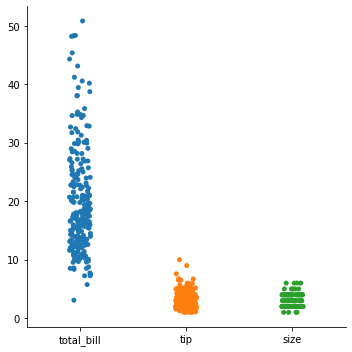

In [56]:
## plots
sns.catplot(data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

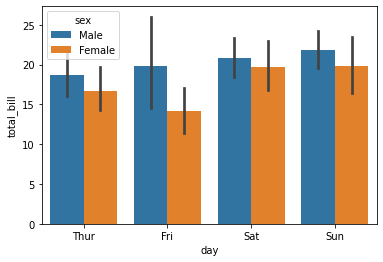

In [62]:
x = tips.day
y = tips.total_bill
sns.barplot(data=tips,x=x,y=y, hue=tips.sex)

## Excercise

In [63]:
exc.head(3)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest


In [67]:
del exc['Unnamed: 0']

In [68]:
exc.head(3)

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest


## Q2

In [69]:
# convert time column to secs
exc.time.unique()

['1 min', '15 min', '30 min']
Categories (3, object): ['1 min', '15 min', '30 min']

In [70]:
# we can split the column at the space, removing the text then multiply by 60

In [76]:
temp = exc.time.str.split(' ')

In [79]:
vals = []
for i in temp:
    vals.append(i[0])

In [83]:
converted = []
for i in vals:
    converted.append(int(i) * 60)

In [85]:
exc.time=converted

In [86]:
exc.head()

,id,diet,pulse,time,kind
0,1,low fat,85,60,rest
1,1,low fat,85,900,rest
2,1,low fat,88,1800,rest
3,2,low fat,90,60,rest
4,2,low fat,92,900,rest


diet
no fat     AxesSubplot(0.125,0.125;0.775x0.755)
low fat    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pulse, dtype: object

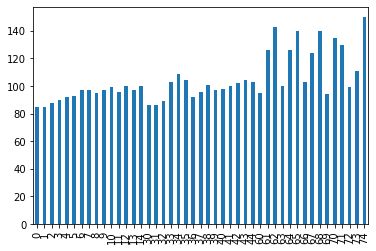

In [91]:
exc.groupby('diet')['pulse'].plot(kind='bar')

<AxesSubplot:xlabel='kind', ylabel='time'>

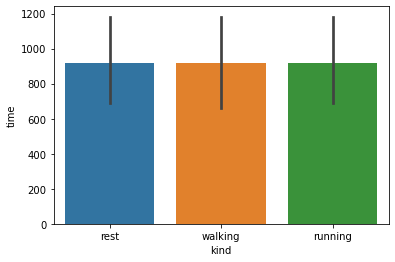

In [92]:
# kind vs time
x = exc.kind
y = exc.time
sns.barplot(data=exc,x=x, y=y)